






<h2 id='part1'>Compare the Data - 2</h2>


Compare 2017 and 2020

First, let's read in the data and necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

df_17 = pd.read_csv('../data/stack_overflow_2017/survey_results_public.csv') #Uncomment for 2017
df_18 = pd.read_csv('../data/stack_overflow_2018/survey_results_public.csv',dtype='string') #Uncomment for 2017
df_19 = pd.read_csv('../data/stack_overflow_2019/survey_results_public.csv') #Uncomment for 2017
df_20 = pd.read_csv('../data/stack_overflow_2020/survey_results_public.csv') #Uncomment for 2020

In [2]:
df_17.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_18.head()

In [ ]:
df_19.head()

In [ ]:
df_20.head()


**1.** # of rows and columns

In [3]:
num_rows_17 = df_17.shape[0] # rows, 2017
num_cols_17 = df_17.shape[1] # columns, 2017

num_rows_18 = df_18.shape[0] # rows, 2018
num_cols_18 = df_18.shape[1] # columns, 2018

num_rows_19 = df_19.shape[0] # rows, 2019
num_cols_19 = df_19.shape[1] # columns, 2019

num_rows_20 = df_20.shape[0] # rows, 2020
num_cols_20 = df_20.shape[1] # columns, 2020

print("Year 2017 - Rows in the dataset: ", num_rows_17, "; Colums in the dataset: ", num_cols_17)
print("Year 2018 - Rows in the dataset: ", num_rows_18, "; Colums in the dataset: ", num_cols_18)
print("Year 2019 - Rows in the dataset: ", num_rows_19, "; Colums in the dataset: ", num_cols_19)
print("Year 2020 - Rows in the dataset: ", num_rows_20, "; Colums in the dataset: ", num_cols_20)

Year 2017 - Rows in the dataset:  51392 ; Colums in the dataset:  154
Year 2018 - Rows in the dataset:  98855 ; Colums in the dataset:  129
Year 2019 - Rows in the dataset:  88883 ; Colums in the dataset:  85
Year 2020 - Rows in the dataset:  64461 ; Colums in the dataset:  61


**2.** What is the percentage of `null` in the various years?

In [4]:
null_per_17 = df_17.isnull().sum().sum()/(num_rows_17*num_cols_17)
null_per_18 = df_18.isnull().sum().sum()/(num_rows_18*num_cols_18)
null_per_19 = df_19.isnull().sum().sum()/(num_rows_19*num_cols_19)
null_per_20 = df_20.isnull().sum().sum()/(num_rows_20*num_cols_20)

print ("Year 2017 - Percentage of Null: ", "{:.2f}".format(null_per_17*100), "%")
print ("Year 2018 - Percentage of Null: ", "{:.2f}".format(null_per_18*100), "%")
print ("Year 2019 - Percentage of Null: ", "{:.2f}".format(null_per_19*100), "%")
print ("Year 2020 - Percentage of Null: ", "{:.2f}".format(null_per_20*100), "%")

Year 2017 - Percentage of Null:  45.32 %
Year 2018 - Percentage of Null:  34.11 %
Year 2019 - Percentage of Null:  13.62 %
Year 2020 - Percentage of Null:  23.11 %


**3. (2017)** - `It's better to ship now and optimize later`

In [ ]:
shipit_vals_17 = df_17.ShipIt.value_counts() #2017

In [ ]:
#Bar chart of the proportion of individuals in each preference 
(shipit_vals_17/(num_rows_17 - df_17.ShipIt.isnull().sum())).plot(kind="bar");
plt.title("Ship It Now! (2017)");

**4. (2017)** - `Tab or Spaces?`

In [ ]:
tabspac_vals_17 = df_17.TabsSpaces.value_counts() #2017

In [ ]:
#Bar chart of the proportion of individuals in each preference 
(tabspac_vals_17/(num_rows_17 - df_17.TabsSpaces.isnull().sum())).plot(kind="bar");
plt.title("Tab VS. Spaces (2017)");

**NOTE** Function to be used to parse the language columns 

In [5]:
def total_count(df, col1, col2, separator):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    separator - separator between strings (comma, semicolon etc.)

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    items_list - a list of the different items that were identified parsing the dataframe
    '''
    new_df = defaultdict(int)
    items_list = [] 

    # loop through rows
    for idx in range(df.shape[0]):
        # Split the string to separate the various languages used by the responder (if > 1)
        langs = df[col1][idx].split(separator)
        # Loop in the list of items
        for idy in range(len(langs)):
            # Update counts in the dataframe
            val = langs[idy]
            new_df[val] += int(df[col2][idx])
            # If not detected before update list            
            if (not(val in items_list)):
                items_list.append(val)
                
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df, items_list

**5.** Languages used

In [6]:
lang_used_17 = df_17.HaveWorkedLanguage.value_counts() #2017
lang_used_18 = df_18.LanguageWorkedWith.value_counts() #2018
lang_used_19 = df_19.LanguageWorkedWith.value_counts() #2019
lang_used_20 = df_20.LanguageWorkedWith.value_counts() #2020

In [7]:
lu_17 = lang_used_17.reset_index()
lu_18 = lang_used_18.reset_index()
lu_19 = lang_used_19.reset_index()
lu_20 = lang_used_20.reset_index()

In [8]:
lu_17.rename(columns={'index': 'language', 'HaveWorkedLanguage': 'count'}, inplace=True)
lu_18.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)
lu_19.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)
lu_20.rename(columns={'index': 'language', 'LanguageWorkedWith': 'count'}, inplace=True)

In [9]:
lu_17_df, worked_languages_17 = total_count(lu_17, 'language', 'count', '; ')

In [10]:
lu_18_df, worked_languages_18 = total_count(lu_18, 'language', 'count', ';')

In [11]:
lu_19_df, worked_languages_19 = total_count(lu_19, 'language', 'count', ';')

In [12]:
lu_20_df, worked_languages_20 = total_count(lu_20, 'language', 'count', ';')

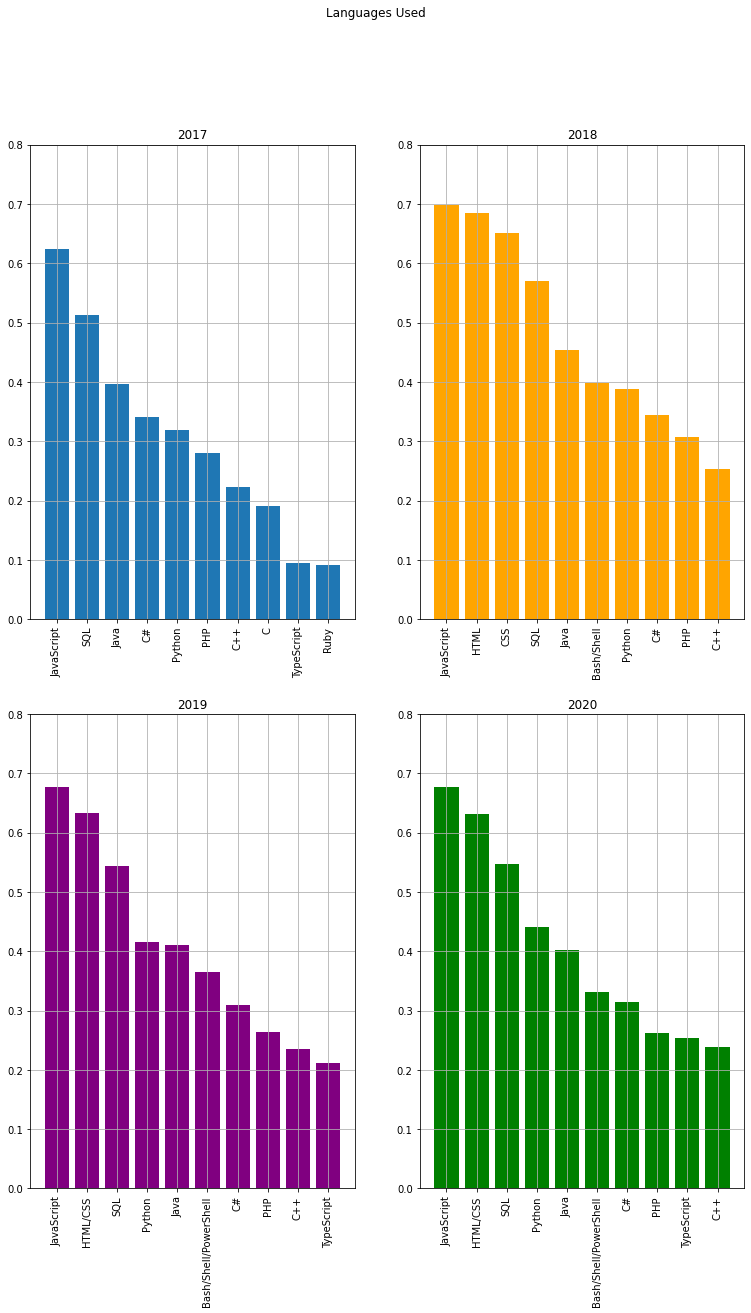

In [13]:
# Bar chart of the proportion of the top 10 languages/combinations for the individuals in count_vals

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle("Languages Used")
fig.set_figheight(19.2) 
fig.set_figwidth(12.8)

ax1.bar(lu_17_df[:10]['language'].to_list(), lu_17_df[:10]['count'].to_list()
        /(num_rows_17 - df_17.HaveWorkedLanguage.isnull().sum()))
ax1.tick_params('x', labelrotation=90)
ax1.set_title("2017")
ax1.set_ylim([0, 0.8])
ax1.grid()

ax2.bar(lu_18_df[:10]['language'].to_list(), lu_18_df[:10]['count'].to_list()
        /(num_rows_18 - df_18.LanguageWorkedWith.isnull().sum()), color = "orange")
ax2.tick_params('x', labelrotation=90)
ax2.set_title("2018")
ax2.set_ylim([0, 0.8])
ax2.grid()

ax3.bar(lu_19_df[:10]['language'].to_list(), lu_19_df[:10]['count'].to_list()
        /(num_rows_19 - df_19.LanguageWorkedWith.isnull().sum()), color = "purple")
ax3.tick_params('x', labelrotation=90)
ax3.set_title("2019")
ax3.set_ylim([0, 0.8])
ax3.grid()

ax4.bar(lu_20_df[:10]['language'].to_list(), lu_20_df[:10]['count'].to_list()
        /(num_rows_20 - df_20.LanguageWorkedWith.isnull().sum()), color = "green")
ax4.tick_params('x', labelrotation=90)
ax4.set_title("2020")
ax4.set_ylim([0, 0.8])
ax4.grid();

**6.** Languages Wanted

In [ ]:
lang_wanted_17 = df_17.WantWorkLanguage.value_counts() #2017
lang_wanted_18 = df_18.LanguageDesireNextYear.value_counts() #2018
lang_wanted_19 = df_19.LanguageDesireNextYear.value_counts() #2019
lang_wanted_20 = df_20.LanguageDesireNextYear.value_counts() #2020

In [ ]:
lw_17 = lang_wanted_17.reset_index()
lw_18 = lang_wanted_18.reset_index()
lw_19 = lang_wanted_19.reset_index()
lw_20 = lang_wanted_20.reset_index()

In [ ]:
lw_17.rename(columns={'index': 'language', 'WantWorkLanguage': 'count'}, inplace=True)
lw_18.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)
lw_19.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)
lw_20.rename(columns={'index': 'language', 'LanguageDesireNextYear': 'count'}, inplace=True)

In [ ]:
lw_17_df, wanted_languages_17 = total_count(lw_17, 'language', 'count', ';')

In [ ]:
lw_18_df, wanted_languages_18 = total_count(lw_18, 'language', 'count', ';')

In [ ]:
lw_19_df, wanted_languages_19 = total_count(lw_19, 'language', 'count', ';')

In [ ]:
lw_20_df, wanted_languages_20 = total_count(lw_20, 'language', 'count', ';')

In [ ]:
# Bar chart of the proportion of the top 10 languages/combinations for the individuals in count_vals

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle("Languages Wanted")
fig.set_figheight(19.2) 
fig.set_figwidth(12.8)

ax1.bar(lw_17_df[:10]['language'].to_list(), lw_17_df[:10]['count'].to_list()
        /(num_rows_17 - df_17.WantWorkLanguage.isnull().sum()))
ax1.tick_params('x', labelrotation=90)
ax1.set_title("2017")
ax1.set_ylim([0, 0.6])
ax1.grid()

ax2.bar(lw_18_df[:10]['language'].to_list(), lw_18_df[:10]['count'].to_list()
        /(num_rows_18 - df_18.LanguageDesireNextYear.isnull().sum()), color = "orange")
ax2.tick_params('x', labelrotation=90)
ax2.set_title("2018")
ax2.set_ylim([0, 0.6])
ax2.grid()

ax3.bar(lw_19_df[:10]['language'].to_list(), lw_19_df[:10]['count'].to_list()
        /(num_rows_19 - df_19.LanguageDesireNextYear.isnull().sum()), color = "purple")
ax3.tick_params('x', labelrotation=90)
ax3.set_title("2019")
ax3.set_ylim([0, 0.6])
ax3.grid()

ax4.bar(lw_20_df[:10]['language'].to_list(), lw_20_df[:10]['count'].to_list()
        /(num_rows_20 - df_20.LanguageDesireNextYear.isnull().sum()), color = "green")
ax4.tick_params('x', labelrotation=90)
ax4.set_title("2020")
ax4.set_ylim([0, 0.6])
ax4.grid();